In [1]:
#CROSS SECTION CALCULATIONS, pretty much just an adaptation of the rutherford scattering code for a N2 molecule 
#we run it for a range of energies that the electrons in the simulation could be at as a way to approximate the cross sections
#for each electron based on the values generated in an array of cross section values for various energies

#this code takes a bit of time to run but only needs to be run once before running the actual simulation many times
import numpy as np
import random
import math
import matplotlib.pyplot as plt

def makeData(N,R,seed):
    np.random.seed(seed)
    xout = []
    yout = []
    numToGen = int(1.1*(math.pi)*N)
    i = 0
    xin = np.random.uniform(-1.0, 1.0, numToGen)
    yin = np.random.uniform(-1.0, 1.0, numToGen)
    rsq = xin*xin+yin+yin
    while len(xout) < N and i < numToGen:
        if rsq[i] < 1:
            xout.append(R*xin[i])
            yout.append(R*yin[i])
        i += 1
    return xout,yout

# Constants
# atomic number
Z = 14

# Charge of the electorn in Coulombs
e = 1.602e-19

#Kinetic energy of a beam particle in eV
EineV = np.linspace(50000, 500000, 100)

#Translation of the kinetic energy to Joules
E = EineV * e

epsilon0 = 8.854e-12

nPass_array = []
for energy in E:
    R=1.0e-12
    thetaMin = math.pi/4.0 - math.pi/16.0
    thetaMax = math.pi/4.0 + math.pi/16.0

    N = 6.25e5
    x,y = makeData(N, R, 321)

    constant = 8*math.pi*epsilon0*energy/(Z*e*e)

    xin = np.array(x)
    yin = np.array(y)
    rsq = xin*xin+yin*yin

    cotanThetaover2 = constant*np.sqrt(rsq)

    nPass = 0
    for ct in cotanThetaover2:
        if ct != 0: 
            thetaOver2 = math.atan(1.0/ct)
            theta = 2.0*thetaOver2
            if theta>thetaMin and theta<thetaMax:
                nPass += 1

    nPass_array.append(nPass)
print(nPass_array)

[187283, 168387, 150887, 134841, 118620, 104175, 92505, 82208, 73995, 66593, 60292, 55017, 50371, 46395, 42761, 39523, 36653, 34043, 31720, 29650, 27739, 26079, 24438, 23013, 21843, 20650, 19540, 18511, 17539, 16578, 15788, 15055, 14303, 13669, 13063, 12478, 11955, 11468, 11041, 10625, 10240, 9806, 9448, 9120, 8796, 8501, 8242, 7980, 7779, 7503, 7232, 6983, 6751, 6544, 6363, 6199, 5989, 5821, 5655, 5538, 5399, 5251, 5106, 4956, 4811, 4711, 4569, 4436, 4327, 4235, 4119, 4008, 3930, 3846, 3752, 3653, 3567, 3483, 3377, 3300, 3217, 3160, 3083, 3004, 2937, 2868, 2809, 2754, 2706, 2642, 2579, 2533, 2497, 2435, 2392, 2342, 2295, 2265, 2222, 2193]


[9.413870351076115e-27, 8.464053794560393e-27, 7.58440785155525e-27, 6.77784792004322e-27, 5.96249152910114e-27, 5.2364066350034674e-27, 4.6498084547251804e-27, 4.132224781860956e-27, 3.7193943744380284e-27, 3.347329273288081e-27, 3.0306064683237727e-27, 2.7654560483607944e-27, 2.5319226168635436e-27, 2.3320670586127752e-27, 2.1494022953624503e-27, 1.9866426631652703e-27, 1.8423807285124273e-27, 1.7111878192985172e-27, 1.594421103549892e-27, 1.490371554862998e-27, 1.3943142178868364e-27, 1.3108735170074914e-27, 1.2283878602948377e-27, 1.1567595477929905e-27, 1.0979489333177896e-27, 1.0379822127460678e-27, 9.821875272183128e-28, 9.304643457696107e-28, 8.816062968209821e-28, 8.333011681793856e-28, 7.935914370380105e-28, 7.567468383967095e-28, 7.18947195588717e-28, 6.87078879710702e-28, 6.566179973414955e-28, 6.272126901038951e-28, 6.0092384277865565e-28, 5.76444552821884e-28, 5.549811918125585e-28, 5.3407075111026475e-28, 5.147185403641517e-28, 4.929033209776242e-28, 4.749082782578619e-2

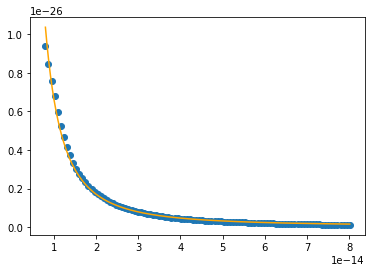

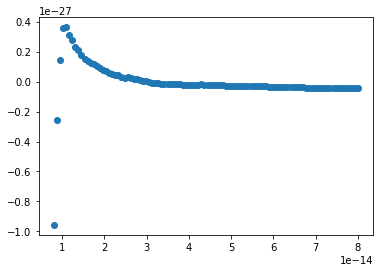

In [2]:
import scipy.optimize as fitter

#taking the nPass array and calculating the cross sections
cross_section_array = []
for elem in nPass_array:
    cross_section_array.append((elem*math.pi*((1.0e-13)**2))/N)
print(cross_section_array)

def model(x,A,B):
    return A/x**2 + B


par0 = [10**-10,0]
par,cov = fitter.curve_fit(model,E,cross_section_array,p0 = par0)

x = np.linspace(E[0],E[-1],1000)
y = model(x,par[0],par[1])

plt.scatter(E, cross_section_array)
plt.plot(x,y,color='orange')
plt.show()

a = []
for i in range(len(E)):
    a.append(cross_section_array[i]-(model(E[i],par[0],par[1])))
plt.scatter(E,a)

In [6]:
import numpy as np
#electron class that stores the position, velocity, etc of each individual electron in the simulation
class Electron():
    def __init__(self):
        #defining all of the initial attributes of the electron
        self.mass = 9.10938358 * 10**-31
        self.charge = 1.602e-12
        self.position = self.initcoordinate(100)
        # we used a range of 50keV to 550keVish for the TGF energy range.
        self.energy = np.random.uniform(8.01088e-15,8.1871e-14,1)[0]
        self.speed = self.energytospeed(self.energy)
        self.velocity = self.initvelocity()
        #we just append to the position/velocity history after every run of the collision/no collision function
        self.positionhistory = []
        self.positionhistory.append(np.array(self.position))
        self.velocityhistory = []
        self.velocityhistory.append(np.array(self.velocity))
        #has collided attribute is to make sure we don't double count collisions between electrons
        self.hascollided = False
        self.atmospherecollision = 0
        self.electroncollision = 0
    
    
    def energytospeed(self,KE):
        #units: joules to meters per second 
        #classically finding what the speed would be given the randomly generated KE value
        return np.sqrt(2*KE/self.mass)

#randomly initializes the electron's position in a given spherical radius from the origin
    def initcoordinate(self,r):
        boolo = True
        while boolo:
            x = np.random.uniform(-r,r,1)[0]
            y = np.random.uniform(-r,r,1)[0]
            if np.sqrt(x**2+y**2)<r:
                boolo = False
        return [x,y]
    
#randomly initializes the electrons velocity
    def initvelocity(self):
        self.angle = np.random.uniform(0,2*np.pi,1)[0]
        vx = self.speed*np.cos(self.angle)
        vy = self.speed*np.sin(self.angle)
        return [vx,vy]

# in the nocollision case the electron's position just changes based on its velocity that remains constant
    def nocollision (self,delta_t):
        for i in range(len(self.position)):
            self.position[i] = self.position[i]+delta_t*self.velocity[i]
        self.positionhistory.append(np.array(self.position))
        self.velocityhistory.append(np.array(self.velocity))
        

    
#in the collision case we find a new velocity given a scatter angle, assuming that the KE of the electron is remaining constant
    def collision_atmosphere (self,delta_t):
        sum = 0
        #the b value is also just randomly made up for now, we were thinking it should be the distance between the electron
        #and the atmosphere particle, but we would still have to randomly generate it since we're not actually simulating
        #the positions of any atmospheric particles
        b = np.random.uniform(-1,1,1)[0]
        c = 8*np.pi*8.854e-12
        atomicno = 14
        #this is just the equation from the Rutherford scattering example
        #scatter_angle = 2*np.arctan((atomicno*self.charge**2)/(b*c*self.energy))
        scatter_angle = np.arctan((b*c*self.energy)/(atomicno*self.charge**2))
        
        #we increment the angle by the scattering angle and then calculate the new velocity 
        self.angle = self.angle + scatter_angle
        vx = self.speed*np.cos(self.angle)
        vy = self.speed*np.sin(self.angle)
        self.velocity = [vx,vy]
        self.velocityhistory.append(np.array(self.velocity))
        
        #right now we are just instantaneously adjusting the velocity then changing the position by the new velocity
        for i in range(len(self.position)):
            self.position[i] = self.position[i]+delta_t*self.velocity[i]
        self.positionhistory.append(np.array(self.position))
        self.hascollided = True
        self.atmospherecollision += 1
    
    def collision_moller (self,electron2,delta_t):
        
        #here we first calculate b as the distance between the two particles
        sum = 0
        for i in range(len(self.position)):
            sum = sum + (self.position[i]-electron2.position[i])**2
        b = np.sqrt(sum)*100
        c = 8*np.pi*8.854e-12
        scatter_angle = 2*np.random.choice([-1,1])*np.arctan((self.charge**2)/(b*c*self.energy))
        
        self.angle = self.angle + scatter_angle
        vx = self.speed*np.cos(self.angle)
        vy = self.speed*np.sin(self.angle)
        self.velocity = [vx,vy]
        self.velocityhistory.append(np.array(self.velocity))
        
        for i in range(len(self.position)):
            self.position[i] = self.position[i]+delta_t*self.velocity[i]
        self.positionhistory.append(np.array(self.position))
        
        self.hascollided = True
        self.electroncollision += 1
    

In [4]:
#this class represents the properties of the medium that the electrons are traveling through
class Atmosphere():
    
    def __init__(self,density):
        self.density = density
   
    #for the cross section we are using the data generated with the rutherford scattering model
    #since we ran the cross section calculation code for many different energy levels within our predifined energy spectrum
    #we just find the cross section for the energy that is the closest to the energy of whatever particular electron we are
    #looking at
    
    def calcCrossSection(self,KE):

        return par[0]/KE**2 + par[1]
        
            
    
    #this just calculates the probability of an electron scattering in the given time step based on the scatter freq
    #from the mini lecture and runs a randomizer to see if the test passes in the given probability
    def scattertest(self,electron,delta_t):
        sigma = self.calcCrossSection(electron.energy)
        scatterfreq = self.density * electron.speed * sigma
        period = 1/scatterfreq
    #this may be kinda a jank way to calculate the probability but we're just approximating it as the size of the time interval
    #the electron could have collided in divided by the average time interval that the electron should collide in
        probability = delta_t/period
        return np.random.uniform(0,1,1)[0]<probability

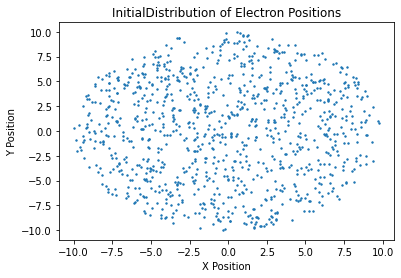

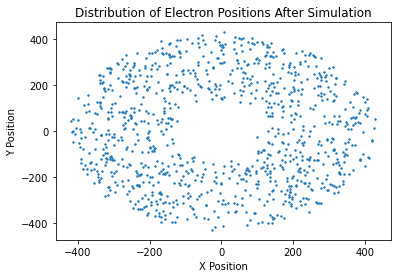

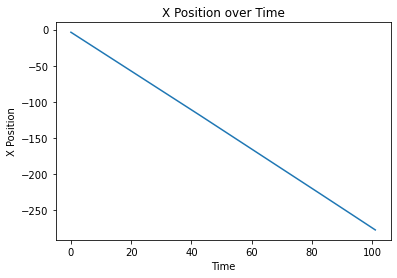

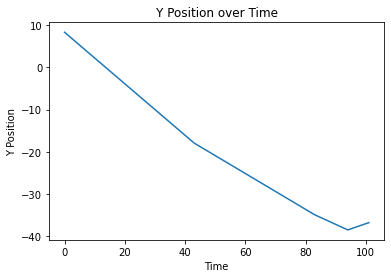

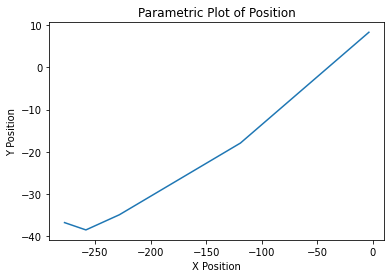

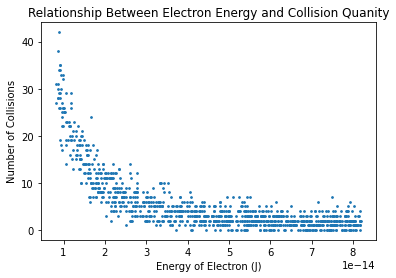

In [5]:
#This cell actually runs the simulation
import numpy as np
import random
import matplotlib.pyplot as plt
N = 1000


    


#creating the array of electrons in the system
electrons = []
for i in range(N):
    electrons.append(Electron())
    
positionx = []
positiony = []
for e in electrons:
    positionx.append(e.position[0])
    positiony.append(e.position[1])
    
plt.scatter(positionx,positiony,s=2)
plt.xlabel('X Position (m)')
plt.ylabel('Y Position (m)')
plt.title('Initial Distribution of Electron Positions')
plt.show()


    
def findmollercrosssection(energy1,energy2):
    a = 1/137
    return (1049.05*np.pi*a**2*0.3894*10**-28)/(energy1+energy2)**2

def mollercollisiontest(electron1,electron2):
    sum = 0
    tolerance = 2*np.sqrt(findmollercrosssection(electron1.energy,electron2.energy)/np.pi)
    for i in range(len(electron1.position)):
        sum = sum + (electron1.position[i]-electron2.position[i])**2
    d = np.sqrt(sum)
    return d<tolerance


#defining the total timeframe and the size of each descrete step in time we simulate
delta_t = 10**-8
tfinal = 10**-6
timeframe = np.arange(0,tfinal+delta_t,delta_t)


#creating atmosphere object, the number density right now is just a number a found on wikipedia, would probably have to be
#for the specific number density of the atmosphere at the altitude that the TGF would take place in
atmosphere = Atmosphere(density = 2.68e25*0.932)


#running through each descrete step in time
for t in timeframe:
    
    for e in electrons:
        e.hascollided = False
    #creating a random order to go through each electron everytime to avoid bias
    index = np.arange(0,len(electrons),1)
    #random.shuffle(index)
    for i in index:
        #We first test if the electron is in close enough to any other electron to collide
        for e in index:
            #we run the collision method for each electron if both of them have not collided in this time step and the collision test passes
            if e != i and not electrons[i].hascollided and not electrons[e].hascollided and mollercollisiontest(electrons[i],electrons[e]):
                electrons[i].collision_moller(electrons[e],delta_t)
                electrons[e].collision_moller(electrons[i],delta_t) 
        #seeing if electron scatters or doesn't scatter, based on a certain probability run in the atmosphere class 
        #runs the corresponding method for each electron to adjust its position and velocity accordingly
        if atmosphere.scattertest(electrons[i],delta_t) and not electrons[i].hascollided:
            electrons[i].collision_atmosphere(delta_t)
            
        if not electrons[i].hascollided:
            electrons[i].nocollision(delta_t)
        

            
            
positionx = []
positiony = []
for e in electrons:
    positionx.append(e.position[0])
    positiony.append(e.position[1])
    
plt.scatter(positionx,positiony,s=2)
plt.xlabel('X Position (m)')
plt.ylabel('Y Position (m)')
plt.title('Distribution of Electron Positions After Simulation')
plt.show()
        

#collecting the history of positions for just the first electron and graphing each component of position
poshistory = electrons[0].positionhistory
posx = []

for p in range(len(poshistory)):
    posx.append(poshistory[p][0])

plt.plot(range(len(posx)),posx)
plt.xlabel('Time')
plt.ylabel('X Position')
plt.title('X Position over Time')
plt.show()

posy = []

for p in range(len(poshistory)):
    posy.append(poshistory[p][1])

plt.plot(range(len(posy)),posy)
plt.xlabel('Time')
plt.ylabel('Y Position')
plt.title('Y Position over Time')
plt.show()


plt.plot(posx,posy)
plt.xlabel('X Position')
plt.ylabel('Y Position')
plt.title('Parametric Plot of Position')
plt.show()


energies = []
atmocollisions = []
electroncollisions = []
collisions = []
for e in electrons:
    energies.append(e.energy)
    atmocollisions.append(e.atmospherecollision)
    electroncollisions.append(e.electroncollision)
    collisions.append(e.atmospherecollision+e.electroncollision)
    

plt.scatter(energies,collisions,3)
plt.xlabel('Energy of Electron (J)')
plt.ylabel('Number of Collisions')
plt.title('Relationship Between Electron Energy and Collision Quantity')
plt.show()
    


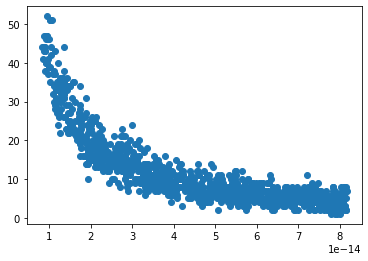